<a href="https://colab.research.google.com/github/Wachiyem/Compression-of-Random-Graphs/blob/main/TMI_based_centralised_TD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

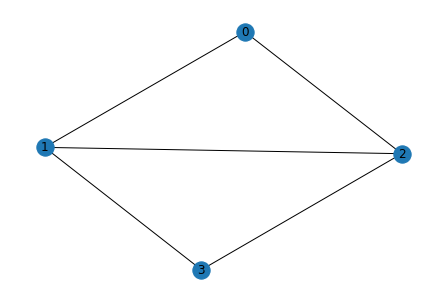

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


p = 0.4
n = 4
G = nx.erdos_renyi_graph(n,p)
nx.draw(G, with_labels= True)
plt.show()

In [ ]:
plt.savefig('4nodeERgraph.png') # Saves the graph

<Figure size 432x288 with 0 Axes>

## Entropy of the Erdos-Renyi(ER) Random Graphs,  $\mathcal{G}(n,p)$

We start with function to obtain the binary entropy, for a certain distribution $p$, that is, 
> $ h(p) = - p\log(p)-(1-p)\log(1-p)$

Then we use the binary entropy function to write a function that gives us the entropy of the ER graph, that is, for $G \in \mathcal{G}$ with edges independently and identically distributed according to a probability $p$, we have 
> $H(G) = \binom{n}{2} h(p) $

where $n$ is the number of nodes in the graph and $H(G)$ is the entropy of the graph.


In [ ]:
import math
def binom(n,k):
    return math.factorial(n)// math.factorial(k)// math.factorial(n-k)

### Binary Entropy Function

This function is used to output the binary entropy given a distribution  𝑝 .


In [ ]:
#We define a function for obtaining the binary entropy of a random variable distributed according to a probability p
def binary_entropy(p):
    x = (1-p)
    if p<1E-10:
        p = 1E-10; #To avoid NaN
    if x<1E-10:
        x = 1E-10; #To avoid NaN
    return -p*math.log2(p)- x*math.log2(x) 

### Entropy of an Erdos Renyi Graph

This function generates the value of the entropy of an ER random graph, $\mathcal{G}(n,p)$.



In [ ]:
#Entropy of an Erdos Renyi Graph
def ER_entropy(n,p):
    return binom(n,2) * binary_entropy(p)

# TMI-based centralised topology discovery

We propose a slight adjustment to the collision-free topology discovery protocol (CFVE) [2]. 

## Collision-free topology discovery protocol (CFVE)
 
CFVE, proposed by Liu and Zhao, is a centralised topology discovery protocol for underwater acoustic networks (UANs), also referred to as the internet of underwater things (IoUT). This protocol uses the uniqueness of the node IDs to access the communication channel by TDMA. The time is divided into frames which are further subdivided into time slots. Each node sends and receives packets at a different time slot assigned according to the node ID, say node $i$ uses the $i$-th time slot of the time frame for the discovery process, thus preventing collision of packets. The exchange of the discovery packets continues until CFVE obtains all the nodes and links in the network.

In CFVE, when the nodes receive the trigger packet (packet that initiates the topology discovery process), they relay it to other nodes and obtain the neighbour lists. These nodes add the neighbour lists in the topological information region of their HELLO message (reply sent by nodes after receiving the trigger packet). Also, nodes receiving HELLO messages add the sender to their neighbour list. The local neighbourhood information obtained is transmitted to the triggering node until the entire topology is accumulated. Lastly, the triggering node will broadcast the whole topology packet throughout the network. 

The packet used in the CFVE protocol is defined as 
> [**Packet type, Sender ID, Topology Info**]

where the Packet Type can be triggering packet, HELLO message, local topology packet, or whole topology packet; Sender ID shows the ID of the node transmitting this packet; and neighbour list and topology information can be put in the Topology Info region. The maximum number of bits for any such single packet is given as 
> $ P_l = 2 + \underbrace{\log_2(n)}_{\text{Sender ID}} + \underbrace{(n-1)\log_2(n)}_{\text{Other node IDs}} + \underbrace{(n-1)\log_2(n-1)}_{hop}$ 

where $P_l$ is the packet length in bits and $n$ is the number of nodes.




In [ ]:
n = 4

P_l = (2 + math.log2(n) + (n-1)*math.log2(n) + (n-1)*math.log2(n-1))  #Maximum number of bits for a CFVE packet



## TMI-based CFVE

We are interested in compressing the Topology Info during the discovery process. Topology information can include the local topology or the entire topology. In CFVE, this information comprises the other node IDs and the hop count. To determine which representation between node neighbour list and adjacency matrix is more efficient for topology compression, we propose topology matrix information (TMI) in the Topology Info region. TMI still captures the node IDs and the hop count since it represents the connectivity. 

![Fig A G(4, 0.4) ER graph](https://drive.google.com/uc?export=view&id=1SKwugVfVijDl_hiQobDvdRZeKIMiHFKq)


We consider the simple case where the topology matrix of a graph is an adjacency matrix $\mathbf{A}$ with elements $A_{ij} = 1$ if there exist a connection between node $i$ and node $j$ and 0 otherwise. The network above, for instance, has the topological matrix 
> $ \mathbf{A} =  \begin{bmatrix}
0 & 1 & 1 & 0  \\
1 & 0 & 1 & 1 \\
1 & 1 & 0 & 1 \\
0 & 1 & 1 & 0 \\
\end{bmatrix}   $

Considering the network above, let node 1 be the triggering node in the network. It generates the triggering packet to the network, which initialises the discovery process. We only have up to one-hop neighbours to the triggering node in this setup. The receiving nodes 0, 2, and 3 reply with a HELLO message and relay the triggering packet to their neighbours. The receiving node adds the topology information of the transmitting node to its topological information. 
>> $ 1 \to 0, 2, 3 $
>>> $ 0 \to 1, 2$ 

>>> $ 2 \to 0, 1, 3$

>>> $ 3 \to 1, 2$

At the end of the discovery process, node 1 has the IDs of nodes 0, 2, and 3 and their neighbour information. It then computes the topology matrix from this information and compresses it before broadcasting to the network nodes. For an ER graph example, we can compress TMI using BernoulliZip [1]. Using the results for the expected length of an ER graph obtained in [1], the expected number of bits for a single packet can be given as

$P_b \leq 2 + \log_2(n) + \binom{n}{2}h(p) + \log_2\log_2\big(\binom{n}{2}\big) + \log_2(\sqrt(\frac{1}{2\pi e}) + 3 $



In [ ]:
p = 0.4
P_b = 2 + math.log2(n) + ER_entropy(n,p) + math.log2(math.log2(binom(n,2))) + math.log2(math.sqrt(1/(2*math.pi*math.exp(1)))) + 3 

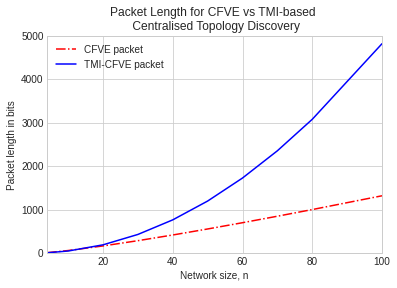

In [ ]:
import matplotlib.pyplot as plt

p = 0.4
n = [4, 10, 20, 30, 40, 50, 60, 70, 80, 100]

P_l = [(2 + math.log2(n[i]) + (n[i]-1)*math.log2(n[i]) + (n[i]-1)*math.log2(n[i]-1)) for i in range(len(n))] #Maximum number of bits for a CFVE packet
P_b = [(2 + math.log2(n[i]) + ER_entropy(n[i],p) + math.log2(math.log2(binom(n[i],2))) + math.log2(math.sqrt(1/(2*math.pi*math.exp(1)))) + 3) for i in range(len(n))]
#print(P_l) #print(P_b)

plt.style.use('seaborn-whitegrid')
plt.plot(n,P_l, '-.r', label = 'CFVE packet') # Plots the packet length for CFVE
plt.plot(n,P_b, 'b', label = 'TMI-CFVE packet') # Plots the packet length for TMI-based centralised topology discovery
plt.xlabel('Network size, n')
plt.ylabel('Packet length in bits')
plt.title('Packet Length for CFVE vs TMI-based \n Centralised Topology Discovery')
plt.legend()
plt.xlim(4,100)
plt.ylim(0,5000)
plt.show()


From the results above, we observe that using neighbourlists is more efficient in terms of representation compared to the topological matrix representation. In their uncompressed form, neighbourlists require $\mathcal{O}(n)$ whereas topology matrix requires $\mathcal{O}(n^2)$.

One of the important parameters to measure the performance of topology discovery algorithms is energy efficiency. The goal of an efficient topology discovery protocol is to lower energy consumption. In [2], we see that the energy consumption depends on the total bit length of the packets in the discovery process. Energy consumption for CFVE, for instance, has been expressed as
>> $ E = (P_t * N_t + P_r* N_t)* \frac{T_p}{ n }$

>>> $T_p = \frac{Bits_{total}}{R_b}$

where $P_t$, $P_r$ and $T_p$ are the transmission power, the received power and the maximum packet transmission delay, respectively. $N_t$ and $N_r$ are the total number of transmitting and receiving packets, respectively, whereas $R_b$ is the transmission rate.

Text(0.5, 1.0, 'Average Energy Consumption per Node for Network Topology Discovery')

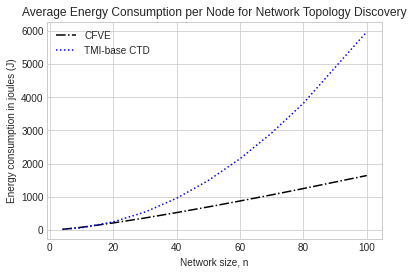

In [ ]:
from matplotlib.cbook import pts_to_midstep

# T_p = Bits_total/ R_b
Pt = 8 # transmission power in Watts
Pr = 1.3 # reception power in Watts
Pi = 0.285 # idle power in Watts

Nt = [n[i] for i in range(len(n))]
Nr = [(n[i] - 1) for i in range(len(n))]
R_b = 7.5 # norminal transmission rate in kbps 

Tp_l = [P_l[i]/R_b for i in range(len(P_l))] # the maximum packet transmission delay for CFVE
Tp_b = [P_b[i]/R_b for i in range(len(P_b))] # the maximum packet transmission delay for TMI-based CTD

E_cfve = [(Pt * Nt[i] + Pr* Nt[i])* Tp_l[i]/ n[i] for i in range(len(n))] # Energy consumption for CFVE in joules
E_tmi = [(Pt * Nt[i] + Pr* Nt[i])* Tp_b[i]/ n[i] for i in range(len(n))] # Energy consumption for TMI-based CTD in joules

#print(E_cfve) #print(E_tmi)

plt.style.use('seaborn-whitegrid')
plt.plot(n, E_cfve, '-.k', label ='CFVE')
plt.plot(n, E_tmi, ':b', label ='TMI-base CTD')
plt.legend()
plt.xlabel('Network size, n')
plt.ylabel('Energy consumption in joules (J)')
plt.title('Average Energy Consumption per Node for Network Topology Discovery')



## References

[1] Farzaneh, A., Badiu, M.A. and Coon, J.P., 2021. BernoulliZip: a Compression Algorithm for Bernoulli Processes and Erdos-Renyi Graphs. [arXiv preprint arXiv:2105.06708](https://arxiv.org/abs/2105.06708)

[2] Liu, Y. and Zhao, R., 2018, May. Collision-free topology discovery protocol based on node ID for underwater acoustic networks. In 2018 OCEANS-MTS/IEEE Kobe Techno-Oceans (OTO) (pp. 1-4). IEEE. [CFVE](https://ieeexplore.ieee.org/abstract/document/8559301)

In [ ]:
!jupyter nbconvert --to pdf /TMI_based_centralised_TD.ipynb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')